In [291]:
import pandas as pd
import numpy as np

# Preparing the dataset

In [292]:
df = pd.read_csv('../01-intro/laptops.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [293]:
df = df[['ram', 'storage', 'screen', 'final_price']]

# EDA

In [294]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [295]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [296]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [297]:
df.describe()

,ram,storage,screen,final_price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


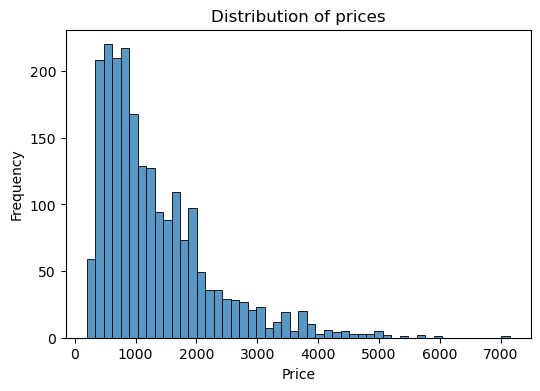

In [298]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price, bins=50)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

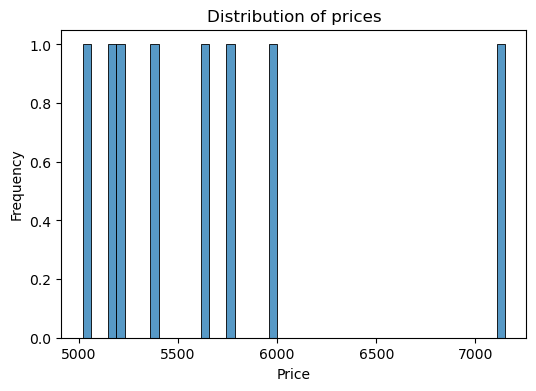

In [299]:
plt.figure(figsize=(6, 4))

sns.histplot(df.final_price[df.final_price > 5000], bins = 50)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

# Prepare and split the dataset

In [300]:
np.random.seed(42)

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.array(df_train.final_price.values)
y_val = np.array(df_val.final_price.values)
y_test = np.array(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

# Functions

In [301]:
def prepare_X(df, fillna_value=0):
    df_num = df
    df_num = df_num.fillna(fillna_value)
    X = df_num.values
    return X

In [302]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [303]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    score = np.sqrt(mse)
    return round(score, 2)

# Missing values filled with "0"

In [304]:
X_train = prepare_X(df_train)

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred)

602.39

# Validating the model

In [305]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

597.36

# Missing values filled with mean

In [306]:
X_train = prepare_X(df_train, df_train.mean())

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

rmse(y_train, y_pred)

602.18

# Validating the model

In [307]:
X_val = df_val.fillna(df_train.screen.mean()).values
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

600.27

# Tuning the model

In [308]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [309]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 676.8954853003689 597.36
0.01 676.2736817205739 597.36
0.1 670.7284836312828 597.35
1 619.9030834107573 597.21
5 463.7771697141752 597.01
10 352.7971336767456 597.06
100 66.92071440179805 597.9


In [310]:
scores = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    np.random.seed(seed)

    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train]
    df_val = df_shuffled.iloc[n_train:n_train + n_val]
    df_test = df_shuffled.iloc[n_train + n_val:]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.array(df_train.final_price.values)
    y_val = np.array(df_val.final_price.values)
    y_test = np.array(df_test.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    X_train = prepare_X(df_train)
    
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    scores.append(rmse(y_val, y_pred))

std = np.std(scores)
print(round(std, 3))

29.176


In [311]:
np.random.seed(9)

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train + n_val:]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.array(df_train.final_price.values)
y_val = np.array(df_val.final_price.values)
y_test = np.array(df_test.final_price.values)

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [312]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

608.61